<html><font size=6><B>3η εργαστηριακή άσκηση</B><BR>
    <BR><B>Link prediction - Πρόβλεψη συνδέσμων</B></BR>
    </font></html>

<html><font size=5><B>Ναυσικά Αμπατζή-03117198</B>
    </font></html>

In [1]:
# imports
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import mean, argsort, zeros, reshape, squeeze, asarray

<html><font size=4><B>1. Κατασκευή γράφου και προεργασία για την πρόβλεψη συνδέσμων</B></font>
    <li><B>1(i).</B> Χρησιμοποιήστε το dataset <a href="http://konect.cc/networks/dbpedia-similar/"> Similarities (DBpedia)</a>, για να κατασκευάσετε τον μη κατευθυνόμενο (undirected) γράφο $G$ <a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]</a>,<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]</a>. Οι κόμβοι του γράφου αναπαριστούν σελίδες της Wikipedia και οι ακμές σχέση ομοιότητας μεταξύ τους. Στην σελίδα <a href="http://konect.cc/networks/dbpedia-similar/"> KONECT (DBpedia)</a> μπορείτε να βρείτε πληροφορίες για τις ιδιότητες του γράφου.</a><BR>
        <B><U>Υπόδειξη:</U></B> Μπορείτε να ελέγξετε προγραμματιστικά αν το dataset περιέχει διπλότυπα των ακμών με την ίδια ή αντίστροφη σειρά (π.χ. ακμές (a,b) και (b,a)), και να λάβετε υπ' όψιν σας αυτήν σας την παρατήρηση, όπου τυχόν χρειαστεί, στην ερώτηση 2.<BR></html>

> Αναφορικά με την υπόδειξη, στο site του dataset αναφέρεται ότι δεν υπάρχουν τέτοιες ακμές.

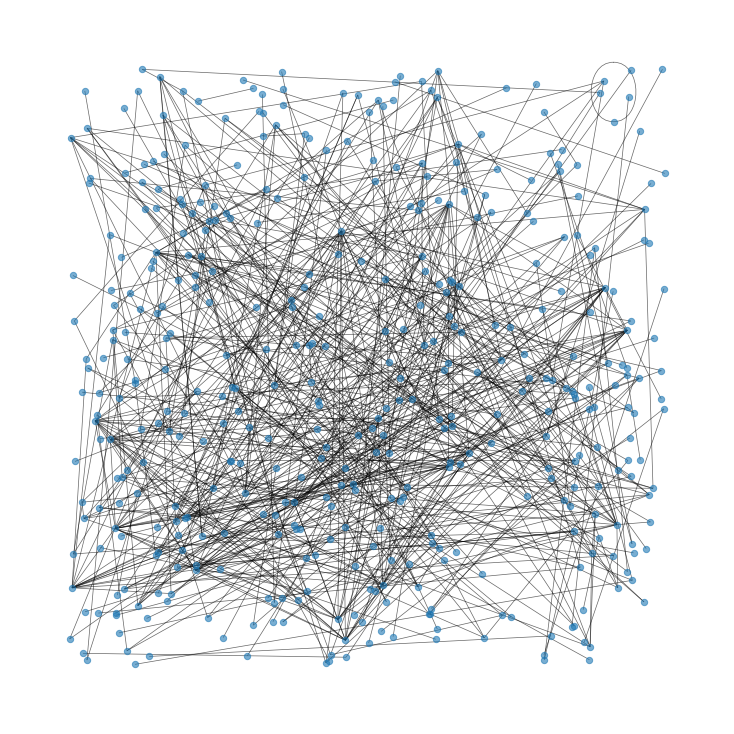

In [2]:
# create matrix
G = nx.read_edgelist('out.dbpedia-similar', create_using = nx.Graph(), nodetype = int)
# plot graph
plt.figure(figsize=(10,10))

pos = nx.random_layout(G, seed=23)
nx.draw(G, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)

plt.show()

In [ ]:
# load edges 
with open("out.dbpedia-similar") as f:
    wik_links = f.read().splitlines() 

# save nodes in 2 lists
node_list_1 = []
node_list_2 = []

for i in wik_links:
  node_list_1.append(i.split(' ')[0])
  node_list_2.append(i.split(' ')[1])

wik_df = pd.DataFrame({'node_1': node_list_1, 'node_2': node_list_2})

 <li><B>1(ii).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G$.</li><BR>

In [4]:
# find node degree
def find_degree(G):
    return dict(G.degree())

initial_node_count = G.number_of_nodes()
initial_edges_count = G.number_of_edges()
initial_node_degree = np.mean(list(find_degree(G)))
initial_connected_components= nx.number_connected_components(G)

print("Graph with",initial_node_count,"nodes,", initial_edges_count, "edges,",initial_node_degree, "average node degree and",initial_connected_components, "connected components.")


Graph with 430 nodes, 565 edges, 215.5 average node degree and 95 connected components.


<li><B>1(iii). </B>Υπολογίστε το σύνολο των ασύνδετων ζευγών κόμβων (unconnected pairs) στον γράφο χρησιμοποιώντας τον πίνακα γειτνίασης (adjacency matrix). Δώστε επίσης τον αριθμό τους. Λάβετε υπ' όψιν σας ότι ο γράφος είναι μη κατευθυνόμενος και δεν χρειάζεται να διατρέξετε ολόκληρο τον πίνακα γειτνίασης.</li><BR>

In [5]:
# find adjacency matrix
A = nx.adjacency_matrix(G).toarray()
nodes_list = list(G.nodes())
# find list of lists of unconnected pairs
# graph is undirected, so the adjacency matrix is symetric
# we use this property to check the "half" matrix
unconnected_pairs = []
for i in range(len(A)):
    for j in range(i,len(A[i])):
        if i!=j and A[i][j] == 0:
            unconnected_pairs.append((nodes_list[i],nodes_list[j]))

# results
print("The set of unconnected pairs is", unconnected_pairs)
print("The number of unconencted pairs in the graph is", len(unconnected_pairs))

The set of unconnected pairs is [(1, 6), (1, 46), (1, 47), (1, 48), (1, 32), (1, 49), (1, 7), (1, 8), (1, 9), (1, 10), (1, 168), (1, 184), (1, 185), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 113), (1, 161), (1, 162), (1, 163), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 68), (1, 89), (1, 90), (1, 100), (1, 101), (1, 102), (1, 104), (1, 74), (1, 157), (1, 158), (1, 42), (1, 54), (1, 147), (1, 251), (1, 312), (1, 73), (1, 43), (1, 44), (1, 45), (1, 154), (1, 50), (1, 51), (1, 52), (1, 53), (1, 55), (1, 56), (1, 57), (1, 58), (1, 59), (1, 60), (1, 61), (1, 62), (1, 63), (1, 64), (1, 65), (1, 66), (1, 67), (1, 261), (1, 78), (1, 79), (1, 81), (1, 92), (1, 93), (1, 94), (1, 95), (1, 96), (1, 97), (1, 98), (1, 99), (1, 69), (1, 70), (1, 71), (1, 72), (1, 144), (1, 145), (1, 146), (1, 75), (1, 76), (1, 7

<li><B>1(iv).</B> Υπολογίστε το σύνολο των ακμών (removable edges) που μπορούν να αφαιρεθούν από τον γράφο χωρίς να υπάρχει κατάτμηση (splitting) του γράφου (δηλ. ο αριθμός των συνεκτικών συνιστωσών θα πρέπει να παραμένει αμετάβλητος). Υπόδειξη: Ελέγχετε επίσης ότι με αφαίρεση ακμής δεν μειώνεται ο αριθμός των κόμβων (εφόσον δεν υπάρχει ξεχωριστό αρχείο μόνο με κόμβους στο dataset). Δώστε επίσης τον αριθμό των ακμών (removable edges) που μπορούν να αφαιρεθούν υπό αυτές τις προϋποθέσεις.</li><BR>

In [6]:
# copy of initial graph
G_rem = G
# get all edges of graph in a list
edges = list(G_rem.edges())
removable_edges = []
for edge in edges:
    G_rem.remove_edge(*edge)
    # removable edges: check splitting and number of nodes
    if (nx.number_connected_components(G_rem) != initial_connected_components) or (G_rem.number_of_nodes() != initial_node_count):
        G_rem.add_edge(*edge)
    else:
        removable_edges.append(edge)

num = initial_edges_count - G_rem.number_of_edges()
print("The edges that can be removed are",removable_edges)
print("The number of edges that can be removed is",num)

The edges that can be removed are [(1, 2), (1, 3), (1, 4), (3, 4), (3, 5), (5, 6), (5, 46), (5, 47), (32, 20), (32, 21), (32, 28), (168, 167), (168, 169), (11, 12), (15, 161), (15, 162), (113, 108), (161, 162), (19, 20), (19, 21), (20, 21), (20, 23), (20, 24), (20, 25), (20, 28), (20, 30), (20, 34), (28, 38), (28, 39), (29, 68), (29, 89), (29, 90), (29, 100), (29, 101), (30, 74), (68, 78), (68, 79), (68, 81), (68, 90), (68, 92), (68, 93), (68, 94), (68, 95), (68, 96), (68, 97), (68, 98), (68, 99), (68, 100), (89, 78), (89, 90), (89, 98), (90, 78), (90, 79), (42, 43), (62, 63), (78, 75), (78, 79), (78, 81), (78, 82), (78, 85), (79, 75), (79, 82), (79, 85), (75, 76), (75, 77), (75, 80), (76, 85), (105, 106), (105, 107), (105, 108), (105, 109), (105, 110), (105, 111), (106, 107), (106, 108), (107, 108), (119, 120), (119, 121), (120, 121), (126, 127), (131, 132), (131, 133), (132, 133), (132, 134), (132, 137), (141, 142), (149, 150), (149, 151), (149, 152), (150, 151), (172, 173), (172, 17

<li><B>1(vα).</B> Κατασκευάστε dataframe που συνενώνει τις απαντήσεις των ερωτημάτων 1(iii) και 1(iv) (unconnected+removables). Χρησιμοποιήστε την μεταβλητή $link$ που θα παίρνει τιμή 1 ή 0 ανάλογα με την ύπαρξη συνδέσμου ή μη. To dataframe αυτό συγκεντρώνει τα θετικά και αρνητικά δείγματα για την πρόβλεψη των μελλοντικών συνδέσεων (link: target variable). <BR>
    <li><B>1(vβ).</B> Κατασκευάστε τον γράφο $G'$ που προκύπτει από την αφαίρεση από τον γράφο $G$ των ακμών του ερωτήματος 1(iv). <BR>
    <li><B>1(vγ).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G'$.</li><BR>

In [7]:
# we will create the same dataframe with two versions for later use

# =============== First version of dataframe ================

#dataframe of removable edges (they will function as positive samples)
df_remove = pd.DataFrame()
df_remove_dict = {}
for i in range(len(removable_edges)):
    df_remove_dict[str(removable_edges[i])] = 1

df_remove = df_remove.append(df_remove_dict, ignore_index=True)

#dataframe of unconnected node pairs (they will function as negative samples)
df_unconn = pd.DataFrame()
df_unconn_dict = {}
for i in range(len(unconnected_pairs)):
    df_unconn_dict[str(unconnected_pairs[i])] = 0

df_unconn = df_unconn.append(df_unconn_dict, ignore_index=True)

#merge in one dataframe

frames = [df_remove, df_unconn]
df_merged1 = pd.concat(frames,axis=1)
df_merged2 = df_merged1.transpose()
df_merged2.columns = ["link"]
df_merged2

,link
"(1, 2)",1.0
"(1, 3)",1.0
"(1, 4)",1.0
"(105, 106)",1.0
"(105, 107)",1.0
...,...
"(99, 85)",0.0
"(99, 86)",0.0
"(99, 87)",0.0
"(99, 88)",0.0


In [8]:
# =============== Second version of dataframe ================

#dataframe of unconnected node pairs (they will function as negative samples)
node_1_unlinked = [i[0] for i in unconnected_pairs]
node_2_unlinked = [i[1] for i in unconnected_pairs]


data = pd.DataFrame({'node_1':node_1_unlinked, 
                     'node_2':node_2_unlinked})

# add target variable 'link'
data['link'] = 0


#dataframe of removable edges (they will function as positive samples)
node_1_rem = [i[0] for i in removable_edges]
node_2_rem = [i[1] for i in removable_edges]

data2 = pd.DataFrame({'node_1':node_1_rem, 
                     'node_2':node_2_rem})

# add target variable 'link'
data2['link'] = 1

#merge in one dataframe

#data = data.append(df_rem[['node_1', 'node_2', 'link']], ignore_index=True)
frames = [data, data2]

df_merged = pd.concat(frames)
# show number of '0' and '1'
df_merged['link'].value_counts()

0    91671
1      230
Name: link, dtype: int64

In [9]:
# display final dataframe
display(df_merged)

,node_1,node_2,link
0,1,6,0
1,1,46,0
2,1,47,0
3,1,48,0
4,1,32,0
...,...,...,...
225,401,404,1
226,402,403,1
227,402,404,1
228,403,404,1


In [10]:
#build graph G'=G_reduced
# we have already the graph from the above question

G_reduced = G_rem

node_count = G_reduced.number_of_nodes()
edges_count = G_reduced.number_of_edges()
node_degree = np.mean(list(find_degree(G_reduced)))
connected_components= nx.number_connected_components(G_reduced)

print("Graph reduced with",node_count,"nodes,", edges_count, "edges,",node_degree, "average node degree and",connected_components, "connected components.")

Graph reduced with 430 nodes, 335 edges, 215.5 average node degree and 95 connected components.


<html><font size=4><B>2. Εισαγωγή σε similarity-based μετρικές για Link prediction</B></font><BR><BR>
     <li> Η μετρική <B>Jaccard Coefficient (JC)</B> των κόμβων ${u}$ και ${v}$ ορίζεται ως $\frac{|\Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|}$, όπου ${\Gamma(u)}$ είναι το σύνολο των γειτονικών κόμβων του κόμβου ${u}$.  <B></B>
        <li> Η μετρική <B>Preferential Αttachment (PA)</B> των κόμβων $u$ και $v$ ορίζεται ως $|\Gamma(u)| |\Gamma(v)|$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li>
        <li> Η μετρική <B>Resource Allocation (RA)</B> των κόμβων $u$ και $v$ ορίζεται ως $\sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{|\Gamma(w)|}$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li><BR><BR>
    <li><B>2(i).</B> Για τον γράφο $G'$, που κατασκευάσατε στο ερώτημα 1(vβ), υπολογίστε την μετρική <B>Jaccard Coefficient (JC)</B>.  <u><a href="https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html?highlight=link%20prediction">Χρησιμοποιήστε την υλοποιημένη συνάρτηση του λογισμικού NetworkX.<a></u> <BR><BR>
    <li><B>2(ii). </B>Δώστε τις $k$ ακμές με την υψηλότερη τιμή μετρικής $JC$, όπου $k$ ο $Α.Μ.$ σας $mod$ $10$. Για $Α.Μ.$ λήγοντα σε $0$ δώστε τις $10$ ακμές με την υψηλότερη τιμή μετρικής.
        (Για την σύγκριση μεταξύ διαφορετικών μετρικών προτιμάται η εύρεση των $k$ επικρατέστερων συνδέσμων, αφού οι μετρικές επιστρέφουν διαφορετικό εύρος τιμών.)</li><BR>
    <li><B>2(iii). </B>Προσδιορίστε για την μέτρηση της απόδοσης της μετρικής $JC$ τα μεγέθη $Precision$, $Recall$ και $Accuracy$ και αναπαραστήστε τα γραφικά για τιμές κατωφλίου: $0.1$, $0.15$, $0.25$, $0.5$, $1.0$.  <BR><BR>
    $Precision=\frac{TP}{TP+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα <BR>
    $Recall=\frac{TP}{TP+FN}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα</li> 
    $Accuracy=\frac{TP+TN}{TP+FN+TN+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $TN$: αληθώς αρνητικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα</li><BR><BR>
        <B><U>Υπόδειξη:</U></B>
        Θετικό θεωρήστε ένα αποτέλεσμα, αν η μετρική $JC$ υπερβαίνει μια τιμή κατωφλίου (>=). Αρνητικό θεωρήστε το στην αντίθετη περίπτωση.
        <li>Αληθώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά (η τιμή της $JC$ υπερβαίνει την τιμή κατωφλίου) και πράγματι θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iv)).</li>
        <li>Αληθώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά και πράγματι δεν θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iii)).</li>
        <li>Ψευδώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά, ενώ δεν θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Ψευδώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά, ενώ θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Το άθροισμα $TN+FP$ πρέπει κάθε φορά να σας δίνει όλες τις ασύνδετες ακμές του γράφου $G$.</li>   
<li>Από το ερώτημα 1(iii) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες δεν θα υπάρξουν συνδέσεις.</li> <li>Από το ερώτημα 1(iv) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες θα υπάρξουν συνδέσεις.</li><BR></html>

In [ ]:
# 2(i)
preds = nx.jaccard_coefficient(G_reduced)
#for u, v, p in preds:
#    print(f"({u}, {v}) -> {p:.8f}")

In [ ]:
# 2(ii)
#k = 98 mod 10 
k = 8
# convert generator object to list
list_preds = list(preds)
# sort list
list_preds.sort(key=lambda tup: tup[2], reverse=True)  # sorts in place
# keep the 8th edges with the bigger JC score
k_preds = list_preds[0:k]
print("k preds:")
k_preds

k preds:


[(4, 46, 1.0),
 (4, 47, 1.0),
 (4, 49, 1.0),
 (23, 34, 1.0),
 (27, 33, 1.0),
 (46, 47, 1.0),
 (46, 49, 1.0),
 (47, 49, 1.0)]

In [ ]:
# 2(iii)
# get only the nodes that are in the dataframe
# less time delay
preds_new = []
for u, v, p in preds:
        if str(df_merged1.get(str((u,v)),'None'))!='None':
            preds_new.append((u,v,p))

In [ ]:
def JCfunction(threshold_jc):  
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    recall_jc = 0
    precision_jc = 0
    accuracy_jc = 0
    for u, v, p in preds_new:
            if p >= threshold_jc:
                if int(df_merged1[str((u,v))]) == 1:
                    TP+=1
                else:
                    FP+=1
            else:
                if int(df_merged1[str((u,v))]) == 0:
                    TN+=1
                else:
                    FN+=1
    
    precision_jc = TP/(TP+FP)
    recall_jc = TP/(TP+FN)
    accuracy_jc = (TP+TN)/(TP+FN+TN+FP)

    return recall_jc, precision_jc, accuracy_jc

In [ ]:
print("Recall,Precision,Accuracy for threshold 0.1:",JCfunction(0.1))
print("Recall,Precision,Accuracy for threshold 0.15:",JCfunction(0.15))
print("Recall,Precision,Accuracy for threshold 0.25:",JCfunction(0.25))
print("Recall,Precision,Accuracy for threshold 0.5:",JCfunction(0.5))
print("Recall,Precision,Accuracy for threshold 1:",JCfunction(1))

Recall,Precision,Accuracy for threshold 0.1: (0.730593607305936, 0.3292181069958848, 0.9955023364485981)
Recall,Precision,Accuracy for threshold 0.15: (0.7123287671232876, 0.33191489361702126, 0.9955957943925233)
Recall,Precision,Accuracy for threshold 0.25: (0.6986301369863014, 0.35253456221198154, 0.995946261682243)
Recall,Precision,Accuracy for threshold 0.5: (0.6301369863013698, 0.42724458204334365, 0.996892523364486)
Recall,Precision,Accuracy for threshold 1: (0.5753424657534246, 0.525, 0.9975817757009345)


In [ ]:
jc_001 = JCfunction(0.1)
jc_015 = JCfunction(0.15)
jc_025 = JCfunction(0.25)
jc_05 = JCfunction(0.5)
jc_1 = JCfunction(1)

<BarContainer object of 5 artists>

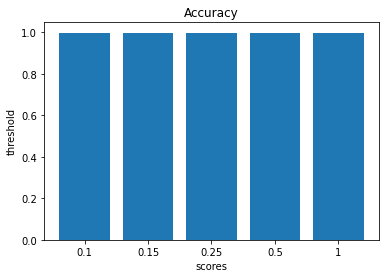

In [ ]:
# plots
# Accuracy
acc = {"0.1":jc_001[2],"0.15":jc_015[2],"0.25":jc_025[2],"0.5":jc_05[2],"1":jc_1[2]}
keys = acc.keys()
values = acc.values()

plt.title('Accuracy')
plt.xlabel('scores')
plt.ylabel('threshold')
plt.bar(keys, values)

<BarContainer object of 5 artists>

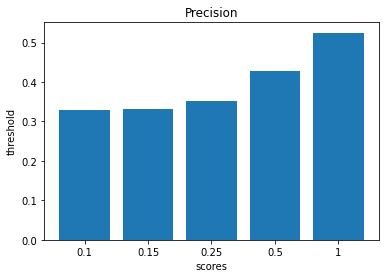

In [ ]:
# Precision
acc = {"0.1":jc_001[1],"0.15":jc_015[1],"0.25":jc_025[1],"0.5":jc_05[1],"1":jc_1[1]}
keys = acc.keys()
values = acc.values()

plt.title('Precision')
plt.xlabel('scores')
plt.ylabel('threshold')
plt.bar(keys, values)

<BarContainer object of 5 artists>

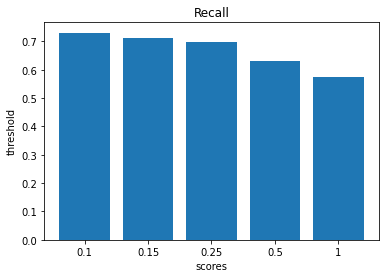

In [ ]:
# Accuracy
acc = {"0.1":jc_001[0],"0.15":jc_015[0],"0.25":jc_025[0],"0.5":jc_05[0],"1":jc_1[0]}
keys = acc.keys()
values = acc.values()

plt.title('Recall')
plt.xlabel('scores')
plt.ylabel('threshold')
plt.bar(keys, values)

> Από τα παραπάνω αποτελέσματα, βλέπουμε αρχικά ότι το **accuracy** παραμένει σχεδόν σταθερό και πολύ υψηλό για τις διάφορες τιμές του threshold. Αυτό σημαίνει ότι τα σωστά αποτελέσματα που προβλέφθηκαν ήταν πολλά. Αναφορικά με το **precision**, αρχικά είναι χαμήλό, αλλά με την αύξηση της τιμής threshold, αυξάνεται επίσης. Αυτό σημαίνει ότι όσο το threshold αυξάνεται, τόσο αυξάνονται και τα αληθώς θετικά αποτελέσματα σε σχέση με τα θετικά αποτελέσματα συνολικά. Τέλος, το **recall** μειώνεται με την αύξηση του threshold, καθώς μειώνονται τα true positives και αυξάνονται τα false negatives. Γενικά με την αύξηση του threshold αναμένουμε είτε την μείωση είτε στη σταθεροποίηση του recall.

<html><font size=4><B>3. Πρόβλεψη συνδέσμων βάσει similarity-based μετρικών</B></font>    
        <li><B>3(i).</B> Προτείνετε μια τουλάχιστον μέθοδο, για να εξερευνήσουμε και να εκφράσουμε μέσα από τα πακέτα NumPy ή SciPy ή Pandas την συσχέτιση (correlation) μεταξύ των τιμών των μετρικών <B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B> για τον μειωμένο γράφο $G'$. Σημ.: Δεν χρειάζεται κάποια υλοποίηση, μόνο αναφορά της μεθόδου συσχέτισης και επεξήγηση της επιλογής σας.
     <li><B>3(ii).</B> Εργαστείτε πάνω σε <B><U>αντίγραφο</U></B> του dataframe που κατασκευάσατε στο ερώτημα 1(vα) (unconnected+removables). Δημιουργήστε στήλη (column) με τις ακμές του γράφου και θέστε την ως index του dataframe. Στο dataframe θα προσθέσετε ως στήλες τις τιμές των μετρικών (<B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B>) για τον μειωμένο γράφο $G'$. Οι τιμές των μετρικών μπορούν να υπολογιστούν με τις συναρτήσεις του πακέτου NetworkX.</li>   </font></html>
    
    |       | link  |Jacc.Coeff.|Pr.Attachment| Resource Allocation|
    |-------|-------|-----------|-------------|--------------------|
    |(1, 6) |  0    |  0.333333 |     32      |    0.700000        |
    |(1, 46)|  0    |  0.200000 |      8      |    0.166667        |

**3(i)**
Για την πρόταση της μεθόδου έγινε μελέτη του άρθρου από το site https://realpython.com/numpy-scipy-pandas-correlation-python/, όπου παρουσιάζονται διάφορες μέθοδοι.

Αρχικά, η συσχέτιση χρησιμοποιείται στην ανάλυση και μοντελοποίηση των δεδομένων, για να εκφραστούν στατιστικές σχέσεις ανάμεσα στις μεταβλητές. Οι μετρικές που εξετάζουμε είναι οι Jaccard Coefficient, Preferential Attachment και Resource Allocation. Πιο αναλυτικά, η **Jaccard Coefficient** εκφράζει την πιθανότητα τα x και y να έχουν ένα κοινό χαρακτηριστικό f, όπου το f έχει επιλεγεί τυχαία είτε από το x είτε από το y. Η μετρική **Preferential Attachment** εκφράζει ότι όσο περισσότερο "πλούσιος" σε συνδέσεις είναι ένας κόμβος, τόσο περισσότερο πιθανό είναι να αποκτήσει νέες συνδέσεις μελλοντικά. Η μετρική **Resource Allocation** εκφράζει τον μέσο όρο των scores των κοινών γειτόνων.

Για τη συσχέτιση των παραπάνω μετρικών, θα προτείναμε την χρήση του Pandas, καθώς είναι η πιο απλή σε χρήση. Φυσικά οι μετρικές θα συγκριθούν ανά δύο. Εφόσον, όλες έχουν τον ίδιο αριθμό στοιχείων, μπορούμε να καλούμε την συνάρτηση .corr() σε μία από τις τρεις μετρικές και τη δεύτερη να την περνάμε ως παράμετρο. Επιπλέον μπορούμε να ορίσουμε ως παράμετρο μία από τις εξής correlation coefficients:
* pearson
* spearman
* kendall

In [11]:
# 3(ii)
#replicate of the dataframe "unconnected+removables"---dataframe will be used again in (4)
df_replica = df_merged1.transpose()
# concat unconnected pairs and removable edges to set as parameter in the metrics functions
unconn_removable = removable_edges + unconnected_pairs  
df_replica.columns = ["link"]

In [12]:
#dataframe for similarity-based measurement values

#Jaccard Coefficient
# create dictionary with jaccard coefficient
preds_jc_dict = {}
for node in unconn_removable:
    temp = nx.jaccard_coefficient(G_reduced,[node])
    x = list(temp)
    z = list(x[0])
    y = z.pop(2)
    preds_jc_dict[str(tuple(z))] = y

# Preferential Attachment
preds_pre_dict = {}
for node in unconn_removable:
    temp = nx.preferential_attachment(G_reduced,[node])
    x = list(temp)
    z = list(x[0])
    y = z.pop(2)
    preds_pre_dict[str(tuple(z))] = y

# Resource Allocation
preds_re_dict = {}
for node in unconn_removable:
    temp = nx.resource_allocation_index(G_reduced,[node])
    x = list(temp)
    z = list(x[0])
    y = z.pop(2)
    preds_re_dict[str(tuple(z))] = y

In [ ]:
df_replica["Jacc.Coeff."] = pd.Series(preds_jc_dict)
df_replica["Pr.Attachment"] = pd.Series(preds_pre_dict)
df_replica["Resource Allocation"] = pd.Series(preds_re_dict)

# display final dataframe
df_replica

,link,Jacc.Coeff.,Pr.Attachment,Resource Allocation
"(1, 2)",1.0,0.0,1,0.0
"(1, 3)",1.0,0.0,2,0.0
"(1, 4)",1.0,0.0,1,0.0
"(105, 106)",1.0,1.0,1,0.2
"(105, 107)",1.0,0.5,2,0.2
...,...,...,...,...
"(99, 85)",0.0,0.0,1,0.0
"(99, 86)",0.0,0.0,1,0.0
"(99, 87)",0.0,0.0,2,0.0
"(99, 88)",0.0,0.0,4,0.0


<li><B>3(iiiα).</B> Χρησιμοποιήστε τον Random Forest Classifier και το αντίγραφο dataframe που κατασκευάσατε στο ερώτημα 3(ii), για να προβλέψετε συνδέσεις. Συμπληρώστε στον κώδικα: τα features ($X$), την target variable ($y$) και τα ορίσματα της συνάρτησης $fit$ για το training του μοντέλου.</li>
<li><B>3(iiiβ).</B> Δώστε τις ($A.M$ $mod$ $10$) πρώτες προβλέψεις και την ακρίβεια ($accuracy$) του μοντέλου. </li>
<li><B>3(iiiγ).</B>Υπολογίστε την πιθανότητα να συνδεθούν οι κόμβοι ($1$,$47$) βάσει του μοντέλου σας. </li>  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
 
X = df_replica.loc[:, df_replica.columns != 'link'] # features
y = df_replica.iloc[:, 0] #target

# convert features and labels to numpy array
np_features = X.values
np_labels = y.values.flatten()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0) 

In [ ]:
classifier = RandomForestClassifier()   

from sklearn.preprocessing import MinMaxScaler 
mm_scaler = MinMaxScaler() 
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

parameters = {'n_estimators' : [10,50,100], 'max_depth' : [5,10,15]} 
model = GridSearchCV(classifier, param_grid = parameters) 

In [ ]:
# with the method fit we train the Classifier at the train set
model.fit(X_train_scaled,y_train )#train the model

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [10, 50, 100]})

In [ ]:
predictions = model.predict(X_test_scaled)      
predictions[:8] #get (A.M. last digit = 8) first predictions

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = model.score(X_test_scaled, y_test)
print("Accuracy of the model:", accuracy)

Accuracy of the model: 0.9985637186629527


In [ ]:
# get base of the target edge
base = X_train.index.get_loc(str((1,47)))
# form input to predict_proba
inpt = X_train_scaled[base].reshape(1, -1)
# compute predict proba
predict_proba = model.predict_proba(inpt)[:,1]
print("Prbpability to get link between nodes 1 and 47 is ",predict_proba[0]*100,"%")

Prbpability to get link between nodes 1 and 47 is  0.03521700340803548 %


> Παρατηρούμε ότι η πιθανότητα να έχουμε σύνδεσμο ανάμεσα στους κόμβους 1 και 47 είναι πάρα πολύ μικρή. 

> Παρατηρούμε μία πολύ υψηλή ακρίβεια (0.9985). Ωστόσο, το accuracy "μετράει" τα true predicted values, αλλά όχι συγκεκριμένα για κάθε label. Επομένως το υψηλό accuracy δεν σημαίνει ότι έχουμε και καλό performance στην πρόβλεψη ενός συγκεκριμένου label.  

<html><font size=4><B>4. Πρόβλεψη συνδέσμων με embedding βασισμένο σε τυχαίους περιπάτους (Random Walks) </B></font><BR><BR>
    <li><B>4(i).</B> Εξάγετε τα χαρακτηριστικά (features) του γράφου $G'$, που προέκυψε από την αφαίρεση των ακμών. Για τον σκοπό αυτό χρησιμοποιήστε τον αλγόριθμο <B>Node2vec</B> <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a>. Ο αλγόριθμος αντιστοιχίζει τους κόμβους του γράφου μέσω τυχαίων περιπάτων (biased 2nd order random walks) σε ένα χώρο μικρού αριθμού διαστάσεων (low dimensional space) διατηρώντας την μεταξύ τους γειτνίαση.
        <BR>Για την επιλογή των παραμέτρων: 
            <li>p - παράμετρος τυχαίων περιπάτων p που καθορίζει την πιθανότητα “1/p” επιστροφής στον κόμβο προέλευσης (source node), </li>
                <li>q - παράμετρος τυχαίων περιπάτων q που καθορίζει την πιθανότητα  “1/q” μετακίνησης σε κόμβο μακριά από τον κόμβο προέλευσης (source node), </li>
                 <li>dimensions - πλήθος διαστάσεων των Node2Vec embeddings, </li>
                     <li>num_walks - αριθμός περιπάτων από κάθε κόμβο, </li>
                         <li>walk_length - μήκος τυχαίου περιπάτου, </li>
                             <li>window_size - μέγεθος παραθύρου context για τον αλγόριθμο Word2Vec, </li><li>num_iter - αριθμός SGD επαναλήψεων (epochs), </li>
            <li>workers - αριθμός workers για τον Word2Vec,</li>
            χρησιμοποιήστε τις τιμές:   </html>
   
                   

 |   p   |   q   | dimensions|  num_walks  |walk_length |window_size|        workers            |
 |-------|-------|-----------|-------------|------------|-----------|---------------------------|
 |  1.0  |  1.0  |  128      |     10      |    80      |     10    |multiprocessing.cpu_count()|

In [ ]:
! pip install node2vec
from node2vec import Node2Vec   
import multiprocessing     

  Created wheel for node2vec: filename=node2vec-0.4.3-py3-none-any.whl size=5978 sha256=7123a48a548b6fcbd9dd0e2003c96b446d80fc1e6c36a1e13b735e82586e698c
  Stored in directory: /root/.cache/pip/wheels/07/62/78/5202cb8c03cbf1593b48a8a442fca8ceec2a8c80e22318bae9
Successfully built node2vec


In [ ]:
# Precompute probabilities and
# generate walks
node2vec_walker = Node2Vec(G_reduced,p=1.0 ,q=1.0 ,dimensions=128 ,num_walks=10, walk_length=80, workers= multiprocessing.cpu_count()) 

Computing transition probabilities:   0%|          | 0/430 [00:00<?, ?it/s]

In [ ]:
# train node2vec model
# embed nodes
n2v_model = node2vec_walker.fit(window=10 , min_count=1) 

<html><font>
    <li><B>4(ii).</B> Εφαρμόστε τον αλγόριθμο Random Forest Classifier, για να προβλέψετε τις συνδέσεις.</li><BR>
    <li><B>4(iii).</B> Υπολογίστε την ακρίβεια ($accuracy$) του μοντέλου. </li><BR></font></html>

In [ ]:
#apply trained Node2Vec model on each node pair of the dataframe "unconnected+removables"
x = [(n2v_model.wv[str(i)]+n2v_model.wv[str(j)]) for i,j in zip(df_merged['node_1'], df_merged['node_2'])]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(x),df_merged['link'],random_state = 0)  

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train,y_train)   

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
predictions = classifier.predict(X_test)      
predictions #get (A.M. last digit = 8) first predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# accuracy of the model
accuracy = classifier.score(X_test, y_test)
print("Accuracy of the model:", accuracy)

Accuracy of the model: 0.9985637186629527


> Παρατηρούμε ότι με τη χρήση του αλγορίθμου node2vec το accuracy του Link prediction παρέμεινε το ίδιο.

<html><font size=4> <B><U>Ερώτηση bonus (+10/100)</U><B>: </font>Για τους binary operators για learning των edge features με τον αλγόριθμο Node2Vec που αναφέρονται στο <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a> ((α) Average, (β) Hadamard, (γ) Weighted-L1 και (δ) Weighted-L2) τροποποιήστε τoν κώδικά σας και σημειώστε τις παρατηρήσεις σας ως προς την απόδοση του αλγορίθμου.</font></html>

In [ ]:
# operator functions
# we calculate link embeddings for the positive and negative edge samples by applying a binary operator on the embeddings of the source and target nodes of each sampled edge
def operator_hadamard(u, v):
    return u * v

def operator_l1(u, v):
    return np.abs(u - v)


def operator_l2(u, v):
    return (u - v) ** 2


def operator_avg(u, v):
    return (u + v) / 2.0


In [ ]:
# use of operator_hadamard
y = [operator_hadamard(n2v_model.wv[str(i)],n2v_model.wv[str(j)]) for i,j in zip(df_merged['node_1'], df_merged['node_2'])]
X_train, X_test, y_train, y_test = train_test_split(np.array(y),df_merged['link'],random_state = 1)  
classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train,y_train)  
# preds
predictions = classifier.predict(X_test) 
predictions     
# accuracy of the model
accuracy = classifier.score(X_test, y_test)
print("Accuracy of the model using operator hadamard:", accuracy)

Accuracy of the model using operator hadamard: 0.9974321030640668


In [ ]:
# use of operator_l1
y = [operator_l1(n2v_model.wv[str(i)],n2v_model.wv[str(j)]) for i,j in zip(df_merged['node_1'], df_merged['node_2'])]
X_train, X_test, y_train, y_test = train_test_split(np.array(y),df_merged['link'],random_state = 1)  
classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train,y_train)   
# accuracy of the model
accuracy = classifier.score(X_test, y_test)
print("Accuracy of the model using operator l1:", accuracy)

Accuracy of the model using operator l1: 0.9974321030640668


In [ ]:
# use of operator_l2
y = [operator_l2(n2v_model.wv[str(i)],n2v_model.wv[str(j)]) for i,j in zip(df_merged['node_1'], df_merged['node_2'])]
X_train, X_test, y_train, y_test = train_test_split(np.array(y),df_merged['link'],random_state = 1)  
classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train,y_train)   
# accuracy of the model
accuracy = classifier.score(X_test, y_test)
print("Accuracy of the model using operator l2:", accuracy)

Accuracy of the model using operator l2: 0.9974202011368605


In [ ]:
# use of operator average
y = [operator_avg(n2v_model.wv[str(i)],n2v_model.wv[str(j)]) for i,j in zip(df_merged['node_1'], df_merged['node_2'])]
X_train, X_test, y_train, y_test = train_test_split(np.array(y),df_merged['link'],random_state = 1)  
classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train,y_train)   
# accuracy of the model
accuracy = classifier.score(X_test, y_test)
print("Accuracy of the model using operator average:", accuracy)

Accuracy of the model using operator average: 0.9985570616528203


> Στο ερώτημα αυτό χρησιμοποιήσαμε 4 binary operators για learning των edge features με τον αλγόριθμο Node2Vec. Πιο συγκεκριμένα, μετράμε link embedings για positive και negative δείγματα ακμών, εφαρμόζοντας ένα binary operator στα embedings των κόμβων κάθε ακμής. Παρατηρούμε βέβαια ότι το accuracy δεν βελτιώνεται, αν και είναι ήδη πολύ υψηλό.

<html><font size=4><B><U>Βιβλιογραφία:</U></B><BR></font>
<a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]	Jérôme Kunegis. KONECT – The Koblenz Network Collection. In Proc. Int. Conf. on World Wide Web Companion, pages 1343–1350, 2013.</a><BR>
<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]	Sören Auer, Christian Bizer, Georgi Kobilarov, Jens Lehmann, Richard Cyganiak, and Zachary Ives. DBpedia: A nucleus for a web of open data. In Proc. Int. Semant. Web Conf., pages 722–735, 2008.<BR>
<a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3] A. Grover, J. Leskovec, Node2vec: Scalable Feature Learning for Networks. ACM KDD, 2016.</a><BR>
 <a href="https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf">[4] T.Mikolov, I.Sutskever, K.Chen, G.S.Corrado and J.Dean, Distributed representations of words and phrases and their compositionality. In NIPS, 2013.</a><BR></font></html>